In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))


In [2]:
# Imports statements.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

#Data Preprocessing and Feature Engineering
from wordcloud import WordCloud, STOPWORDS 
from gensim.parsing.preprocessing import remove_stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score
%matplotlib inline

In [3]:
def display_all_details(dataframe):
    print(('='*50)+'DATA'+('='*50))
    print(('-'*50)+'SHAPE'+('-'*50))
    print(dataframe.shape)
    print(('-'*50)+'COLUMNS'+('-'*50))
    print(dataframe.columns)
    print(('-'*50)+'DESCRIBE'+('-'*50))
    print(dataframe.describe())
    print(('-'*50)+'INFO'+('-'*50))
    print(dataframe.info())
    print(('='*50)+'===='+('='*50))

In [4]:
twitter_data = pd.read_csv('/content/twitter sentiment dataset.csv')
twitter_data.head()

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...


In [5]:
display_all_details(twitter_data)

==================================================DATA==================================================
--------------------------------------------------SHAPE--------------------------------------------------
(3090, 3)
--------------------------------------------------COLUMNS--------------------------------------------------
Index(['Unnamed: 0', 'sentiment', 'text'], dtype='object')
--------------------------------------------------DESCRIBE--------------------------------------------------
        Unnamed: 0
count  3090.000000
mean   2689.072816
std    1438.624297
min       3.000000
25%    1368.250000
50%    3030.500000
75%    3949.750000
max    4722.000000
--------------------------------------------------INFO--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3090 entries, 0 to 3089
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3090 non-null   int64 
 

In [6]:
twitter_data.tail()

,Unnamed: 0,sentiment,text
3085,2579,sad,today at 02 30pm a 54 year old bangladeshi mal...
3086,3579,anger,corona virus i implore that you cease activity...
3087,221,joy,issa date once lockdown ends inshaallah (and c...
3088,2705,sad,the death toll due to covid 19 rose to 31 in j...
3089,2962,sad,the rates are become barrier for poor people t...


In [7]:
# Checking missing values columns
twitter_data.isnull().sum()

Unnamed: 0    0
sentiment     0
text          0
dtype: int64

In [8]:
print(twitter_data.sentiment.value_counts())


fear     801
sad      795
anger    767
joy      727
Name: sentiment, dtype: int64


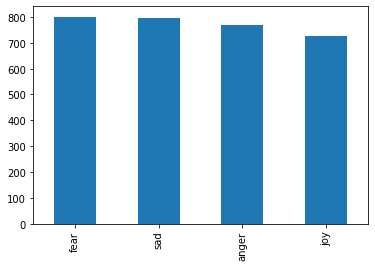

In [9]:
twitter_data.sentiment.value_counts().plot(kind = 'bar')

In [10]:
# # Creating a mapping for sentiments
# mapping = {'fear':0,
#           'sad':1,
#           'anger':2,
#           'joy':3}

In [11]:
# twitter_data['sentiment'] = twitter_data['sentiment'].map(mapping)

In [12]:
twitter_data.head()

,Unnamed: 0,sentiment,text
0,3204,sad,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...


In [13]:
for tweet in twitter_data.text.head(20):
    print(tweet)

agree the poor in india are treated badly their poors seek a living in singapore and are treated like citizens they are given free medical treatment given food daily sim cards to call home to tell their family that they are fine if covid 19 case treated foc in hospitals
if only i could have spent the with this cutie vc sakshi__s i n g h coast crossing republik …
will nature conservation remain a priority in post corona bangladesh | the daily star
coronavirus disappearing in italy show this to "intellectuals" who say lockdowns do not work …
uk records lowest daily virus death toll since start of lockdown govt
joe biden's coronavirus web address lands on a donation page for his campaign he is profiting from fear demopos
respected sir in our telangana all private teachers and lecturers are in horrible situations due to covid 19 and mainly private management (chaithanya nd narayana) b'caz they told to all faculty's like “no work no pay “ so pls take the action nd save their life's
so is al

In [14]:
def clean_text_column(row):
    text = row['text'].lower()
    text = re.sub(r'[^(a-zA-Z\s)]','',text)
    text = re.sub(r'\(','',text)
    text = re.sub(r'\)','',text)
    text = text.replace('\n',' ')
    text = text.strip()
    return text

In [15]:
twitter_data['cleaned_text'] = twitter_data.apply(clean_text_column,axis = 1)

In [16]:
twitter_data.head()

,Unnamed: 0,sentiment,text,cleaned_text
0,3204,sad,agree the poor in india are treated badly thei...,agree the poor in india are treated badly thei...
1,1431,joy,if only i could have spent the with this cutie...,if only i could have spent the with this cutie...
2,654,joy,will nature conservation remain a priority in ...,will nature conservation remain a priority in ...
3,2530,sad,coronavirus disappearing in italy show this to...,coronavirus disappearing in italy show this to...
4,2296,sad,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll since...


In [17]:
# These are new stopwords which i add after several model runs and found out these are irrelevant words which are created which cleaning process.
new_additions=['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn']

In [18]:
new_string = ''
stopwords = set(list(STOPWORDS)+new_additions)
for val in twitter_data.cleaned_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    new_string += " ".join(tokens)+" "

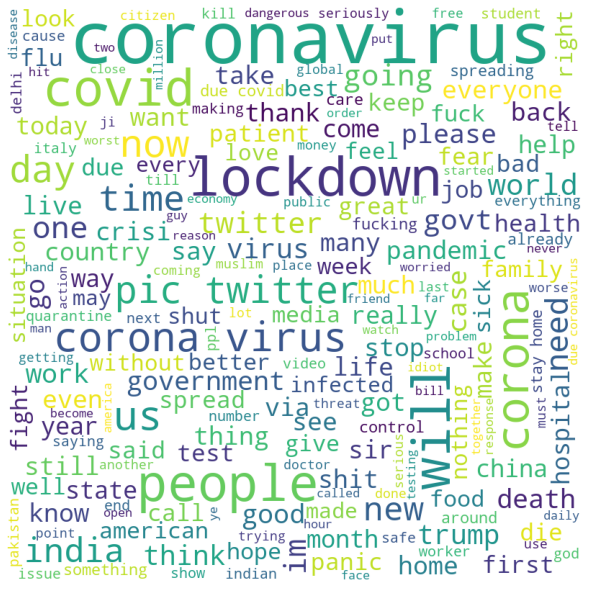

In [19]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(new_string) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [20]:
# Check for spaced entry which can be created due to cleaning step.
twitter_data.cleaned_text.str.isspace().sum()

0

In [21]:
#stopword removel
filtered_sentences = []
for tweet in twitter_data.cleaned_text:
    filtered_sentences.append(remove_stopwords(tweet))

In [22]:
filter_sentence_df = pd.DataFrame(filtered_sentences,columns = ['filter_sentence'])

In [23]:
new_twitter_data = pd.concat([twitter_data,filter_sentence_df],axis = 1)

In [24]:
new_twitter_data.head()

,Unnamed: 0,sentiment,text,cleaned_text,filter_sentence
0,3204,sad,agree the poor in india are treated badly thei...,agree the poor in india are treated badly thei...,agree poor india treated badly poors seek livi...
1,1431,joy,if only i could have spent the with this cutie...,if only i could have spent the with this cutie...,spent cutie vc sakshis n g h coast crossing re...
2,654,joy,will nature conservation remain a priority in ...,will nature conservation remain a priority in ...,nature conservation remain priority post coron...
3,2530,sad,coronavirus disappearing in italy show this to...,coronavirus disappearing in italy show this to...,coronavirus disappearing italy intellectuals l...
4,2296,sad,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll start...


In [25]:
#Normalizing the words in tweets 
def normalization(tweet):
    lem = WordNetLemmatizer()
    normalized_tweet = []
    for word in tweet['filter_sentence'].split():
        normalized_text = lem.lemmatize(word,'v')
        normalized_tweet.append(normalized_text)
    return normalized_tweet

In [26]:
import nltk
nltk.download('wordnet')
new_twitter_data['normalised_tweet'] = new_twitter_data.apply(normalization,axis = 1)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [27]:
new_twitter_data.head()

,Unnamed: 0,sentiment,text,cleaned_text,filter_sentence,normalised_tweet
0,3204,sad,agree the poor in india are treated badly thei...,agree the poor in india are treated badly thei...,agree poor india treated badly poors seek livi...,"[agree, poor, india, treat, badly, poors, seek..."
1,1431,joy,if only i could have spent the with this cutie...,if only i could have spent the with this cutie...,spent cutie vc sakshis n g h coast crossing re...,"[spend, cutie, vc, sakshis, n, g, h, coast, cr..."
2,654,joy,will nature conservation remain a priority in ...,will nature conservation remain a priority in ...,nature conservation remain priority post coron...,"[nature, conservation, remain, priority, post,..."
3,2530,sad,coronavirus disappearing in italy show this to...,coronavirus disappearing in italy show this to...,coronavirus disappearing italy intellectuals l...,"[coronavirus, disappear, italy, intellectuals,..."
4,2296,sad,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll since...,uk records lowest daily virus death toll start...,"[uk, record, lowest, daily, virus, death, toll..."


In [36]:
from textblob import TextBlob
new_twitter_data['emottions'] = ' '
new_twitter_data['polarity'] = None
for i,tweets in enumerate(new_twitter_data.filter_sentence) :
    blob = TextBlob(tweets)
    new_twitter_data['polarity'][i] = blob.sentiment.polarity
    if blob.sentiment.polarity > 0 :
        new_twitter_data['emottions'][i] = 'positive'
    elif blob.sentiment.polarity <=0 :
        new_twitter_data['emottions'][i] = 'negative'
    # else :
    #     new_twitter_data['emottions'][i] = 'neutral'
new_twitter_data.sample(10)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Unnamed: 0,sentiment,text,cleaned_text,filter_sentence,normalised_tweet,emottions,polarity
129,3971,anger,hm this corona virus is getting serious chale ...,hm this corona virus is getting serious chale ...,hm corona virus getting chale dansoman,"[hm, corona, virus, get, chale, dansoman]",negative,0
2049,156,joy,wow beautiful coronavirus plus the best wishes...,wow beautiful coronavirus plus the best wishes...,wow beautiful coronavirus plus best wishes son...,"[wow, beautiful, coronavirus, plus, best, wish...",positive,0.707143
2046,1179,joy,the department of psychology of r d national c...,the department of psychology of r d national c...,department psychology r d national college hon...,"[department, psychology, r, d, national, colle...",negative,0
2592,145,fear,government needs to revamp administration & fo...,government needs to revamp administration foc...,government needs revamp administration focus n...,"[government, need, revamp, administration, foc...",positive,0.136364
1021,849,sad,chief minister naveen pattnaik appealed all od...,chief minister naveen pattnaik appealed all od...,chief minister naveen pattnaik appealed odisha...,"[chief, minister, naveen, pattnaik, appeal, od...",negative,0
3028,3879,anger,this demonstrates that we deserve the coronavirus,this demonstrates that we deserve the coronavirus,demonstrates deserve coronavirus,"[demonstrate, deserve, coronavirus]",negative,0
2808,1045,joy,v important depration during lockdown can decr...,v important depration during lockdown can decr...,v important depration lockdown decrease immunity,"[v, important, depration, lockdown, decrease, ...",positive,0.4
1473,4530,fear,if you do not recognize the difference between...,if you do not recognize the difference between...,recognize difference taking precautions outrig...,"[recognize, difference, take, precautions, out...",negative,-0.5
793,4000,anger,the impacts of this shutdown will have a far g...,the impacts of this shutdown will have a far g...,impacts shutdown far greater negative impact c...,"[impact, shutdown, far, greater, negative, imp...",positive,0.1
1173,4363,fear,corona virus killing white people and gas chea...,corona virus killing white people and gas chea...,corona virus killing white people gas cheaper ...,"[corona, virus, kill, white, people, gas, chea...",negative,0


negative    1975
positive    1115
Name: emottions, dtype: int64


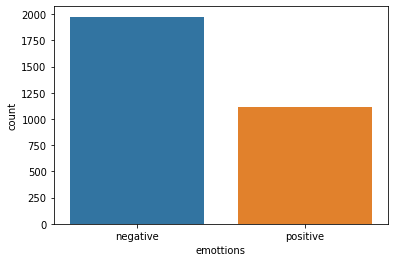

In [34]:
print(new_twitter_data.emottions.value_counts())
sns.countplot(x='emottions', data = new_twitter_data);

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


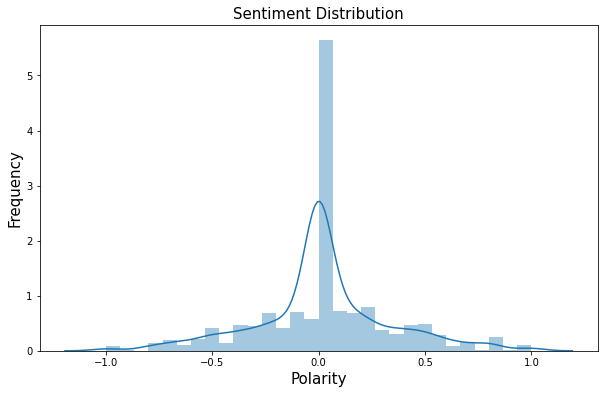

In [37]:
# Sentiment Distribution
plt.figure(figsize=(10,6))
sns.distplot(new_twitter_data['polarity'], bins=30)
plt.title('Sentiment Distribution',size = 15)
plt.xlabel('Polarity',size = 15)
plt.ylabel('Frequency',size = 15)
plt.show();

# Sentiment Classification means that, either the text is positive or negative

In [40]:
X1=new_twitter_data['filter_sentence']
Y1=new_twitter_data['emottions']

In [41]:
count_vect = CountVectorizer()
count_vect.fit(X)

# transform the training and validation data using count vectorizer object
X1_text =  count_vect.transform(X)

In [42]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1_text, Y, test_size=0.3)

In [45]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(X1_train, Y1_train)

pred = mnb.predict(X1_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(Y1_test, pred))
print('\n')
print(classification_report(Y1_test, pred))
print("Multinomial Accuracy : {}".format(mnb.score(X1_train, Y1_train)))

[[480 105]
 [122 220]]


              precision    recall  f1-score   support

    negative       0.80      0.82      0.81       585
    positive       0.68      0.64      0.66       342

    accuracy                           0.76       927
   macro avg       0.74      0.73      0.73       927
weighted avg       0.75      0.76      0.75       927

Multinomial Accuracy : 0.9727230698104484


In [47]:
text1=["""agree the poor in india are treated badly their poors seek a 
living in singapore and are treated like citizens they are given free medical treatment given food daily sim cards to call home to
 tell their family that they are fine if covid 19 case treated foc in hospitals"""]

In [48]:
text1=count_vect.transform(text1)

In [49]:
mnb.predict(text1)

array(['negative'], dtype='<U8')

# Emotions classification means, the text belongs to which emotions like happy,sad,fear,anger.

In [38]:
X=new_twitter_data['filter_sentence']
y=new_twitter_data['sentiment']

In [ ]:
count_vect = CountVectorizer()
count_vect.fit(X)

# transform the training and validation data using count vectorizer object
X_text =  count_vect.transform(X)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_text, y, test_size=0.3)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)

preds = nb.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, preds))
print('\n')
print(classification_report(y_test, preds))
print("Multinomial Accuracy : {}".format(nb.score(X_train,y_train)))

[[123  69   5  24]
 [ 40 168   7  19]
 [  6  15 154  49]
 [ 14  21  21 192]]


              precision    recall  f1-score   support

       anger       0.67      0.56      0.61       221
        fear       0.62      0.72      0.66       234
         joy       0.82      0.69      0.75       224
         sad       0.68      0.77      0.72       248

    accuracy                           0.69       927
   macro avg       0.70      0.68      0.69       927
weighted avg       0.70      0.69      0.69       927

Multinomial Accuracy : 0.9639389736477115


In [ ]:
text=["""agree the poor in india are treated badly their poors seek a 
living in singapore and are treated like citizens they are given free medical treatment given food daily sim cards to call home to
 tell their family that they are fine if covid 19 case treated foc in hospitals"""]

In [ ]:
text=count_vect.transform(text)

In [ ]:
nb.predict(text)

array(['sad'], dtype='<U5')

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.callbacks import EarlyStopping
from keras.layers import Dropout

In [ ]:
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 1000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(new_twitter_data.filter_sentence.values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 9810 unique tokens.


In [ ]:
X = tokenizer.texts_to_sequences(new_twitter_data.filter_sentence.values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (3090, 250)


In [ ]:
Y = pd.get_dummies(new_twitter_data.sentiment).values
print('Shape of label tensor:', Y.shape)

Shape of label tensor: (3090, 4)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(2472, 250) (2472, 4)
(618, 250) (618, 4)


In [ ]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.1))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.1))
model.add(Dense(4, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 250, 100)          100000    
_________________________________________________________________
spatial_dropout1d_1 (Spatial (None, 250, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 404       
Total params: 180,804
Trainable params: 180,804
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 20
batch_size = 64
# I am using EarlyStopping to monitor val_loss upto 3 patience level to prevent the model from overfitting.
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.1,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/20
35/35 [==============================] - 24s 688ms/step - loss: 1.3514 - accuracy: 0.3507 - val_loss: 1.2469 - val_accuracy: 0.5121
Epoch 2/20
35/35 [==============================] - 23s 670ms/step - loss: 1.0994 - accuracy: 0.5459 - val_loss: 0.9594 - val_accuracy: 0.5726
Epoch 3/20
35/35 [==============================] - 23s 671ms/step - loss: 0.8269 - accuracy: 0.6412 - val_loss: 0.8666 - val_accuracy: 0.6169
Epoch 4/20
35/35 [==============================] - 24s 673ms/step - loss: 0.6666 - accuracy: 0.7316 - val_loss: 0.8886 - val_accuracy: 0.6371
Epoch 5/20
35/35 [==============================] - 24s 678ms/step - loss: 0.5495 - accuracy: 0.7797 - val_loss: 0.9335 - val_accuracy: 0.6492
Epoch 6/20
35/35 [==============================] - 23s 670ms/step - loss: 0.4345 - accuracy: 0.8485 - val_loss: 1.0185 - val_accuracy: 0.6573
